In [1]:
import dwave.system
import numpy as np
import matplotlib.pyplot as plt
import src.particle_funcs.distance_matrix as distance_matrix
import src.leap_funcs.qubo.q_matrix as q_matrix
import src.leap_funcs.qubo.q_matrix_old as q_matrix_old

[1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 1.]


C:\Users\oahre\AppData\Local\Temp\ipykernel_16320\3949810453.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig_initial.show()


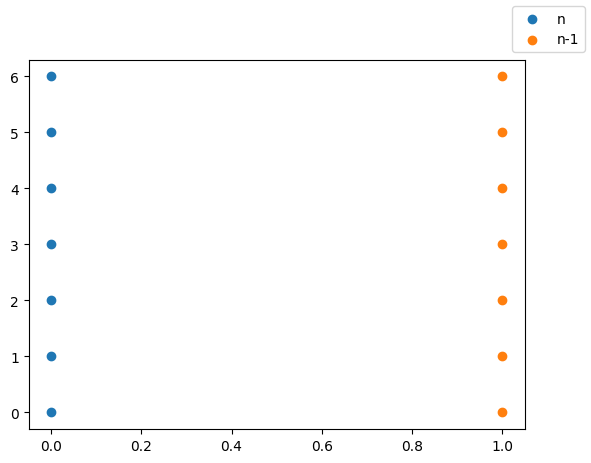

In [2]:
num_particles = 7

part_coords_n = np.zeros((num_particles,2))
part_coords_nm1 = np.zeros((num_particles,2))

for i in range(np.shape(part_coords_n)[0]):
    part_coords_n[i,:] = [0, i]
    part_coords_nm1[i,:] = [1, i]

fig_initial, axs_initial = plt.subplots(1,1)
axs_initial.scatter(part_coords_n[:,0], part_coords_n[:,1], label="n")
axs_initial.scatter(part_coords_nm1[:,0], part_coords_nm1[:,1], label="n-1")
fig_initial.legend()
fig_initial.show()

correct_sol = np.zeros(num_particles*num_particles)
for i in range(1, num_particles+1):
    correct_sol[(i-1)*num_particles + i -1] = 1.

print(correct_sol)

In [3]:
distances = distance_matrix.calc_phi_ij(part_coords_n, part_coords_nm1, type='tanh_minimum', tanh_min=0.01)
with np.printoptions(precision=3):
    print(distances)
#ids_remove = np.where(distances > 4)
#print(ids_remove)
#print(np.shape(ids_remove))
print(np.max(distances))
print(np.min(distances))
print(np.max(distances)/np.min(distances)) # should be as large as possible, to make shortest distance matching most probable

min:  1.0
tanh_min:  0.01
min:  0.01
min:  0.00999966667999946
[[0.01  0.014 0.022 0.032 0.041 0.051 0.061]
 [0.014 0.01  0.014 0.022 0.032 0.041 0.051]
 [0.022 0.014 0.01  0.014 0.022 0.032 0.041]
 [0.032 0.022 0.014 0.01  0.014 0.022 0.032]
 [0.041 0.032 0.022 0.014 0.01  0.014 0.022]
 [0.051 0.041 0.032 0.022 0.014 0.01  0.014]
 [0.061 0.051 0.041 0.032 0.022 0.014 0.01 ]]
0.06075271542976784
0.00999966667999946
6.075474050678169


In [4]:
Q_dist = q_matrix.q_dist_diag(distances)
assert (Q_dist.transpose() == Q_dist).all(), 'Q_dist is not symmetric'
with np.printoptions(precision=3):
    print(Q_dist)
max_abs = np.max(Q_dist)
print(max_abs)
#for i in range(np.shape(Q_dist)[0]):
#    print(Q_dist[i,:])

[[0.01  0.    0.    ... 0.    0.    0.   ]
 [0.    0.014 0.    ... 0.    0.    0.   ]
 [0.    0.    0.022 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.022 0.    0.   ]
 [0.    0.    0.    ... 0.    0.014 0.   ]
 [0.    0.    0.    ... 0.    0.    0.01 ]]
0.06075271542976784


In [5]:
Q_part = q_matrix.q_part(np.shape(distances)[0])
#assert (Q_part.transpose() == Q_part).all(), 'Q_part is not symmetric'
#Q_part = q_matrix_old.q_part(np.shape(distances)[0])

#for i in range(np.shape(Q_part)[0]):
#    print(Q_part[i,:])

print(Q_part)

[[-1.  2.  2. ...  0.  0.  0.]
 [ 0. -1.  2. ...  0.  0.  0.]
 [ 0.  0. -1. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -1.  2.  2.]
 [ 0.  0.  0. ...  0. -1.  2.]
 [ 0.  0.  0. ...  0.  0. -1.]]


In [6]:
Q_pos = q_matrix.q_pos(np.shape(distances)[0])
#assert (Q_pos.transpose() == Q_pos).all(), 'Q_pos is not symmetric'
#Q_pos = q_matrix_old.q_pos(np.shape(distances)[0])

#for i in range(np.shape(Q_pos)[0]):
#    print(Q_pos[i,:])

print(Q_pos)

[[-1.  0.  0. ...  0.  0.  0.]
 [ 0. -1.  0. ...  0.  0.  0.]
 [ 0.  0. -1. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -1.  0.  0.]
 [ 0.  0.  0. ...  0. -1.  0.]
 [ 0.  0.  0. ...  0.  0. -1.]]


In [7]:
lm = np.max(Q_dist)
Q_array = Q_dist + 0.1*lm*(Q_part + Q_pos) # choice of multiplier is crucial
print('lambda Q_2 and Q_3: ', lm)

#Q_array = Q_dist/np.min([x for x in Q_dist.flatten() if x > 0.0]) + Q_part + Q_pos


with np.printoptions(precision=3, suppress=True):
    print(Q_array)


lambda Q_2 and Q_3:  0.06075271542976784
[[-0.002  0.012  0.012 ...  0.     0.     0.   ]
 [ 0.     0.002  0.012 ...  0.     0.     0.   ]
 [ 0.     0.     0.01  ...  0.     0.     0.   ]
 ...
 [ 0.     0.     0.    ...  0.01   0.012  0.012]
 [ 0.     0.     0.    ...  0.     0.002  0.012]
 [ 0.     0.     0.    ...  0.     0.    -0.002]]


In [8]:
Q_dict = q_matrix.Q_convert_to_dict(Q_array)
#Q_dict = q_matrix.Q_convert_to_dict_sym(Q_array)
print(Q_dict)

{(1, 1): -0.0021508764059541084, (1, 2): 0.012150543085953569, (1, 3): 0.012150543085953569, (1, 4): 0.012150543085953569, (1, 5): 0.012150543085953569, (1, 6): 0.012150543085953569, (1, 7): 0.012150543085953569, (1, 8): 0.012150543085953569, (1, 15): 0.012150543085953569, (1, 22): 0.012150543085953569, (1, 29): 0.012150543085953569, (1, 36): 0.012150543085953569, (1, 43): 0.012150543085953569, (2, 2): 0.001990649804154419, (2, 3): 0.012150543085953569, (2, 4): 0.012150543085953569, (2, 5): 0.012150543085953569, (2, 6): 0.012150543085953569, (2, 7): 0.012150543085953569, (2, 9): 0.012150543085953569, (2, 16): 0.012150543085953569, (2, 23): 0.012150543085953569, (2, 30): 0.012150543085953569, (2, 37): 0.012150543085953569, (2, 44): 0.012150543085953569, (3, 3): 0.010206410654287004, (3, 4): 0.012150543085953569, (3, 5): 0.012150543085953569, (3, 6): 0.012150543085953569, (3, 7): 0.012150543085953569, (3, 10): 0.012150543085953569, (3, 17): 0.012150543085953569, (3, 24): 0.01215054308595

In [9]:
from dwave.system import DWaveSampler, EmbeddingComposite

with open('API_Token.txt') as file:
    token = file.readline().rstrip()
    architecture = file.readline().rstrip()

sampler = DWaveSampler(token = token, architecture='pegasus')
print(DWaveSampler._get_solver(sampler))

sampler = EmbeddingComposite(sampler)
sample = sampler.sample_qubo(Q_dict, num_reads = 1000) # auto_scale=False, chain_strength=2

StructuredSolver(id='Advantage_system4.1')


In [10]:
print(sample.info)

{'timing': {'qpu_sampling_time': 141240.0, 'qpu_anneal_time_per_sample': 20.0, 'qpu_readout_time_per_sample': 100.7, 'qpu_access_time': 156999.57, 'qpu_access_overhead_time': 2701.43, 'qpu_programming_time': 15759.57, 'qpu_delay_time_per_sample': 20.54, 'post_processing_overhead_time': 2847.0, 'total_post_processing_time': 2847.0}, 'problem_id': '70ab0512-84fb-46c3-8bff-4367a4e799d9'}


In [11]:
print(sample)

     1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 ... 49    energy num_oc. ...
0    1  0  0  0  0  0  0  0  1  0  0  0  0  0  0 ...  1 -0.015056       2 ...
1    1  0  0  0  0  0  0  0  1  0  0  0  0  0  0 ...  1 -0.012905       1 ...
2    1  0  0  0  0  0  0  0  0  0  0  0  0  0  0 ...  1 -0.012905       1 ...
3    1  0  0  0  0  0  0  0  1  0  0  0  0  0  0 ...  0 -0.012905       3 ...
4    1  0  0  0  0  0  0  0  1  0  0  0  0  0  0 ...  1 -0.012905       1 ...
313  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0 ...  1 -0.012905       1 ...
5    1  0  0  0  0  0  0  0  0  0  0  0  0  0  0 ...  1 -0.010754       1 ...
6    1  0  0  0  0  0  0  0  1  0  0  0  0  0  0 ...  1 -0.010754       3 ...
7    1  0  0  0  0  0  0  0  1  0  0  0  0  0  0 ...  1 -0.010754       1 ...
8    1  0  0  0  0  0  0  0  0  0  0  0  0  0  0 ...  0 -0.010754       2 ...
9    1  0  0  0  0  0  0  0  0  0  0  0  0  0  0 ...  1 -0.010754       1 ...
10   1  0  0  0  0  0  0  0  1  0  0  0  0  0  0 ...  1 -0.01075

In [12]:
#usually is sorted for energies automatically
ids_sorted_energies = np.argsort(sample.data_vectors['energy'])

print(sample.record[ids_sorted_energies[0:7]])

[([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1], -0.01505613, 2, 0.        )
 ([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], -0.01290526, 1, 0.        )
 ([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], -0.01290526, 3, 0.        )
 ([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1], -0.01290526, 1, 0.02040816)
 ([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1], -0.01290526, 1, 0.        )
 ([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 

In [13]:
from src.leap_funcs.qubo import filter_samples

ids_valid_solutions= filter_samples.indices_of_valid_solutions(sample, sort_energies=False)
print(ids_valid_solutions)
print(sample.record[ids_valid_solutions])

[0, 25, 187, 272, 725]
[([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1], -0.01505613, 2, 0.)
 ([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1], -0.00677308, 1, 0.)
 ([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0],  0.00150997, 1, 0.)
 ([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],  0.0055842 , 1, 0.)
 ([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0],  0.02726407, 1, 0.)]


In [14]:
for i, sol in enumerate(sample.record):
    if np.array_equal(correct_sol, sol[0]):
        print(i)
        print(sol)
for i, sol in enumerate(sample.record[ids_valid_solutions]):
    if np.array_equal(correct_sol, sol[0]):
        print(ids_valid_solutions[i])
        print(sol)

0
([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1], -0.01505613, 2, 0.)
0
([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1], -0.01505613, 2, 0.)


In [15]:
print(sample.record[ids_sorted_energies[0]][0])
print(correct_sol)
print(correct_sol - sample.record[ids_sorted_energies[0]][0])
print(np.array_equal(correct_sol, sample.record[ids_sorted_energies[0]][0]))
correct_sol - sample.record[ids_sorted_energies[0]][0]

[1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 1]
[1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
True


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])